In [2]:
import numpy as np
import pandas as pd

import matplotlib.pyplot as plt
import seaborn as sns


In [72]:
# importing the dataset using dask

%time data = pd.read_csv('fraud.csv')

print(data.shape)

CPU times: user 600 ms, sys: 91.8 ms, total: 692 ms
Wall time: 696 ms
(472406, 11)


In [73]:
data.head()

,step,type,amount,nameOrig,oldbalanceOrg,newbalanceOrig,nameDest,oldbalanceDest,newbalanceDest,isFraud,isFlaggedFraud
0,1,PAYMENT,9839.64,C1231006815,170136.0,160296.36,M1979787155,0.0,0.0,0.0,0.0
1,1,PAYMENT,1864.28,C1666544295,21249.0,19384.72,M2044282225,0.0,0.0,0.0,0.0
2,1,TRANSFER,181.00,C1305486145,181.0,0.00,C553264065,0.0,0.0,1.0,0.0
3,1,CASH_OUT,181.00,C840083671,181.0,0.00,C38997010,21182.0,0.0,1.0,0.0
4,1,PAYMENT,11668.14,C2048537720,41554.0,29885.86,M1230701703,0.0,0.0,0.0,0.0


In [74]:
# getting the information related to data

data.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 472406 entries, 0 to 472405
Data columns (total 11 columns):
 #   Column          Non-Null Count   Dtype  
---  ------          --------------   -----  
 0   step            472406 non-null  int64  
 1   type            472406 non-null  object 
 2   amount          472406 non-null  float64
 3   nameOrig        472406 non-null  object 
 4   oldbalanceOrg   472406 non-null  float64
 5   newbalanceOrig  472406 non-null  float64
 6   nameDest        472405 non-null  object 
 7   oldbalanceDest  472405 non-null  float64
 8   newbalanceDest  472405 non-null  float64
 9   isFraud         472405 non-null  float64
 10  isFlaggedFraud  472405 non-null  float64
dtypes: float64(7), int64(1), object(3)
memory usage: 39.6+ MB


In [75]:
#describing the data

data.describe()

,step,amount,oldbalanceOrg,newbalanceOrig,oldbalanceDest,newbalanceDest,isFraud,isFlaggedFraud
count,472406.000000,4.724060e+05,4.724060e+05,4.724060e+05,4.724050e+05,4.724050e+05,472405.000000,472405.0
mean,13.593310,1.681755e+05,9.105087e+05,9.303556e+05,9.833078e+05,1.166694e+06,0.000470,0.0
std,3.598471,2.752304e+05,2.988083e+06,3.025458e+06,2.339877e+06,2.518074e+06,0.021673,0.0
min,1.000000,1.000000e-01,0.000000e+00,0.000000e+00,0.000000e+00,0.000000e+00,0.000000,0.0
25%,11.000000,1.346055e+04,0.000000e+00,0.000000e+00,0.000000e+00,0.000000e+00,0.000000,0.0
50%,14.000000,8.188668e+04,1.867771e+04,0.000000e+00,1.163630e+05,2.216331e+05,0.000000,0.0
75%,17.000000,2.249509e+05,1.736931e+05,2.137904e+05,8.942951e+05,1.205396e+06,0.000000,0.0
max,19.000000,1.000000e+07,3.890000e+07,3.890000e+07,4.150000e+07,4.150000e+07,1.000000,0.0


In [76]:
#checking how many frauds are there

data['isFraud'].value_counts()

0.0    472183
1.0       222
Name: isFraud, dtype: int64

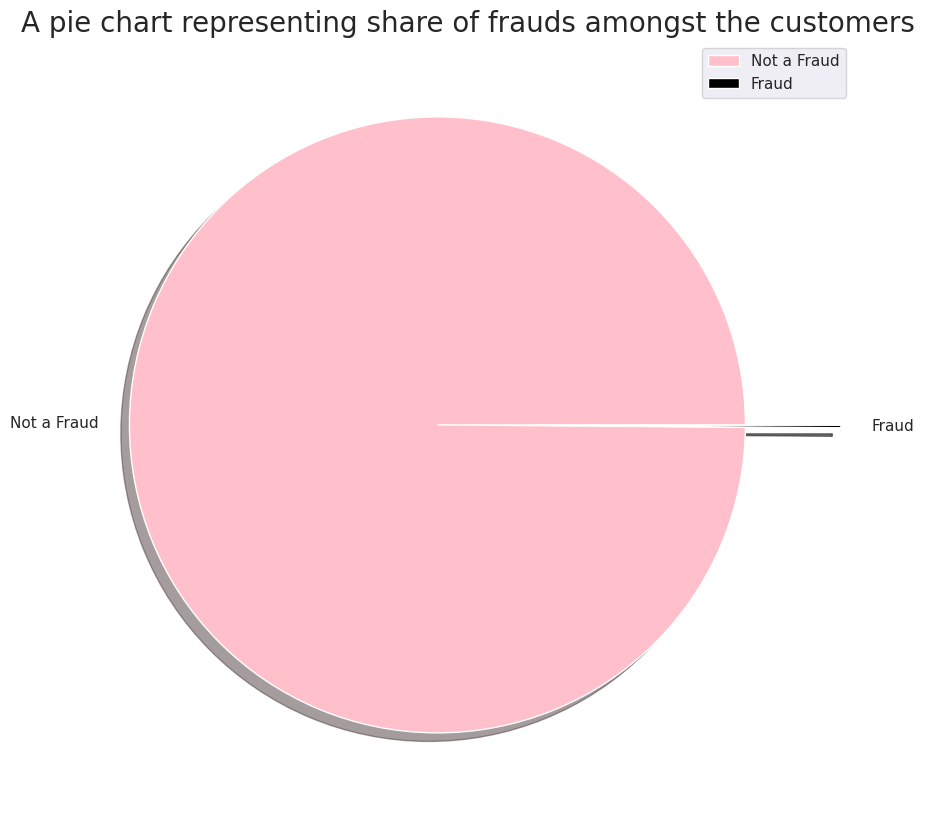

In [77]:
labels = ['Not a Fraud', 'Fraud']
colors = ['pink', 'black']
size = [6354407, 8213]
explode = [0.1, 0.21]

plt.rcParams['figure.figsize'] = (10, 10)
plt.pie(size, labels = labels, colors = colors, explode = explode, shadow = True)
plt.axis('off')
plt.title('A pie chart representing share of frauds amongst the customers',fontsize = 20)
plt.legend()
plt.show()

In [78]:
data['isFlaggedFraud'].value_counts()

0.0    472405
Name: isFlaggedFraud, dtype: int64

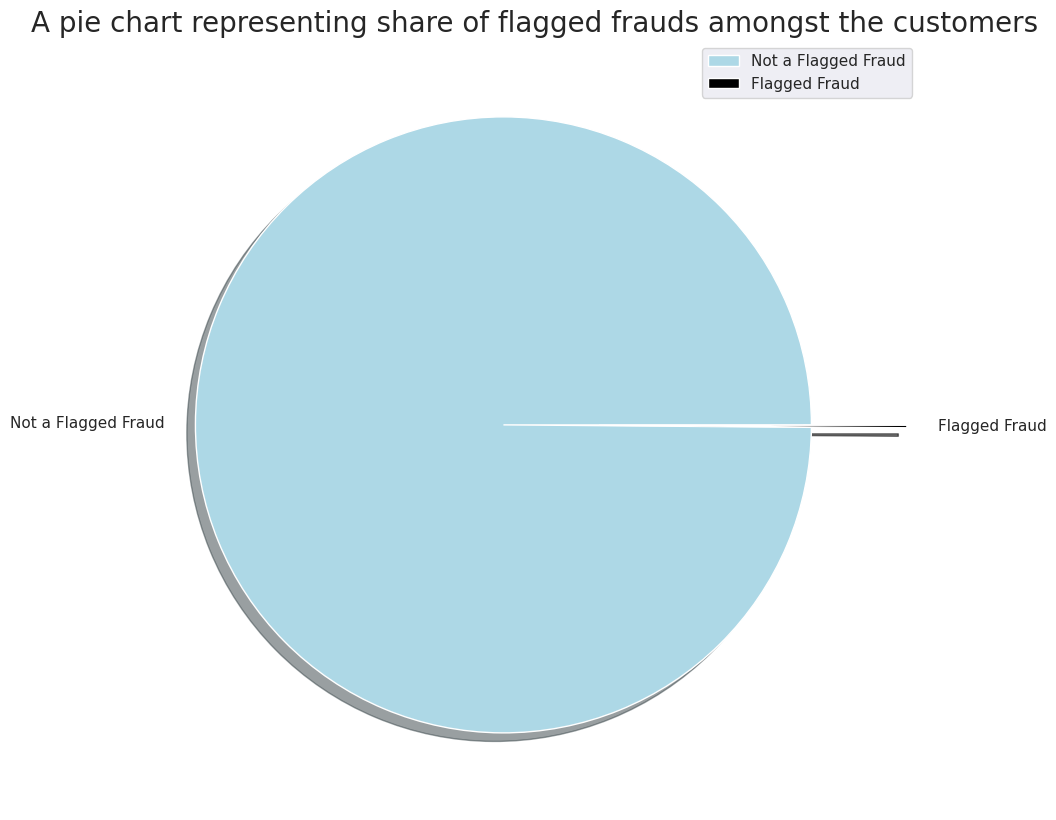

In [79]:
labels = ['Not a Flagged Fraud', 'Flagged Fraud']
colors = ['lightblue', 'black']
size = [6354407, 8213]
explode = [0.1, 0.21]

plt.rcParams['figure.figsize'] = (10, 10)
plt.pie(size, labels = labels, colors = colors, explode = explode, shadow = True)
plt.axis('off')
plt.title('A pie chart representing share of flagged frauds amongst the customers',fontsize = 20)
plt.legend()
plt.show()

In [80]:
data['type'].value_counts()

CASH_OUT    171599
PAYMENT     155466
CASH_IN     103334
TRANSFER     38620
DEBIT         3387
Name: type, dtype: int64

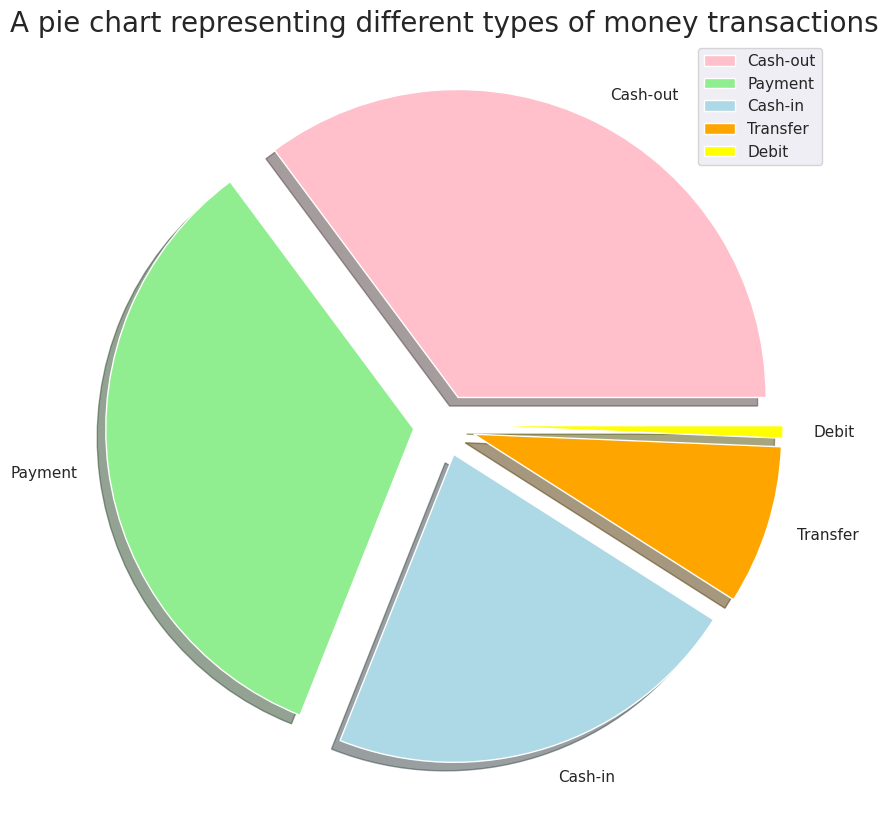

In [81]:
labels = ['Cash-out', 'Payment', 'Cash-in', 'Transfer', 'Debit']
size = [2237500, 2151495, 1399284, 532909, 41432]
colors = ['pink', 'lightgreen', 'lightblue', 'orange', 'yellow']
explode = [0.1, 0.1, 0.1, 0.1, 0.1]

plt.rcParams['figure.figsize'] = (10, 10)
plt.pie(size, colors = colors, explode = explode, labels = labels, shadow = True)
plt.title('A pie chart representing different types of money transactions', fontsize = 20)
plt.axis('off')
plt.legend()
plt.show()

In [82]:
# checking the different types of steps involved in transactions

x = data['step'].value_counts().nunique()

# printing the result
print("The no. of different steps involved in transactions are :", x)

The no. of different steps involved in transactions are : 19


<ipython-input-83-f827899b7a57>:7: UserWarning: 

`distplot` is a deprecated function and will be removed in seaborn v0.14.0.

Please adapt your code to use either `displot` (a figure-level function with
similar flexibility) or `histplot` (an axes-level function for histograms).

For a guide to updating your code to use the new functions, please see
https://gist.github.com/mwaskom/de44147ed2974457ad6372750bbe5751

  sns.distplot(data.step, fit = norm, kde = False)


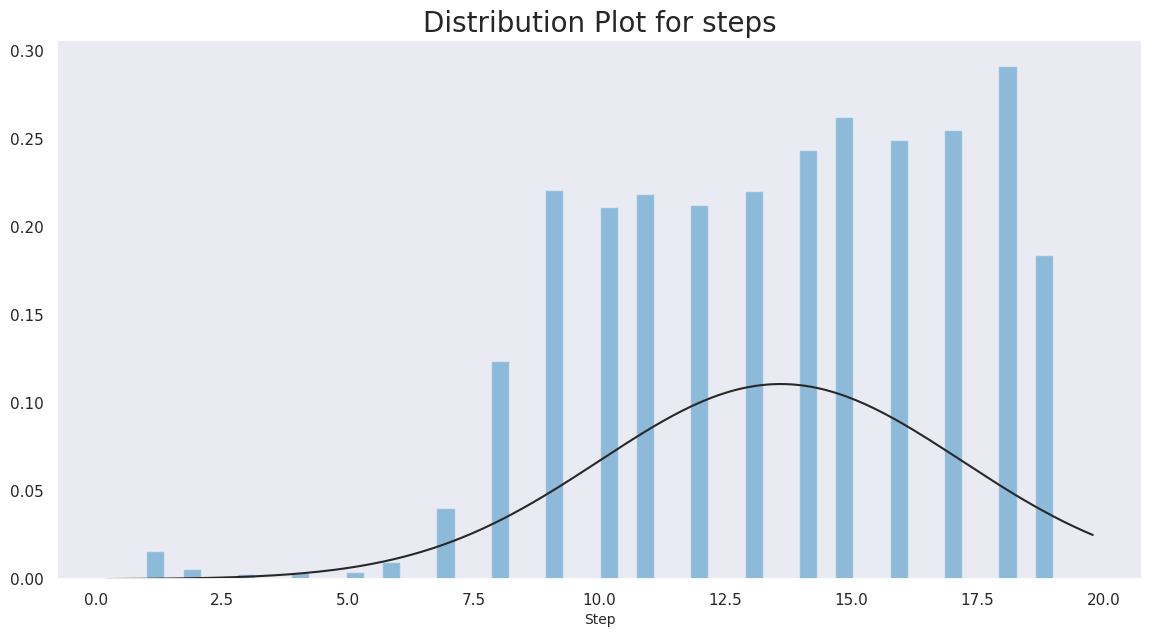

In [83]:
# setting thesze of the figure
plt.rcParams['figure.figsize'] =(14, 7)

# importing norm
from scipy.stats import norm

sns.distplot(data.step, fit = norm, kde = False)
plt.title('Distribution Plot for steps', fontsize = 20)
plt.xlabel('Step', fontsize = 10)
plt.show()

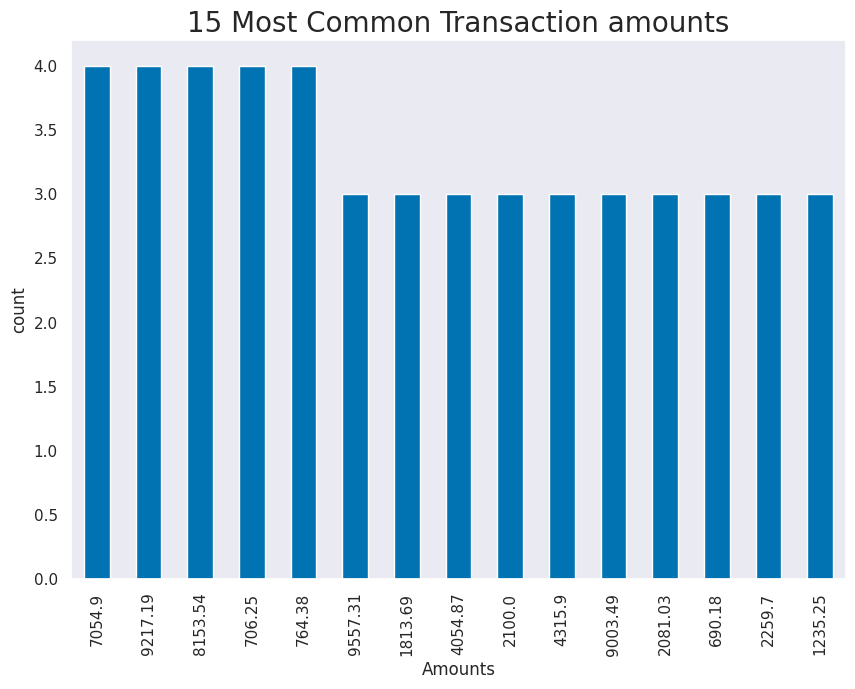

In [84]:
# checking the different values of amounts transationed

plt.rcParams['figure.figsize'] = (10, 7)

data['amount'].value_counts().head(15).plot.bar()
plt.title('15 Most Common Transaction amounts', fontsize = 20)
plt.xlabel('Amounts')
plt.ylabel('count')
plt.show()

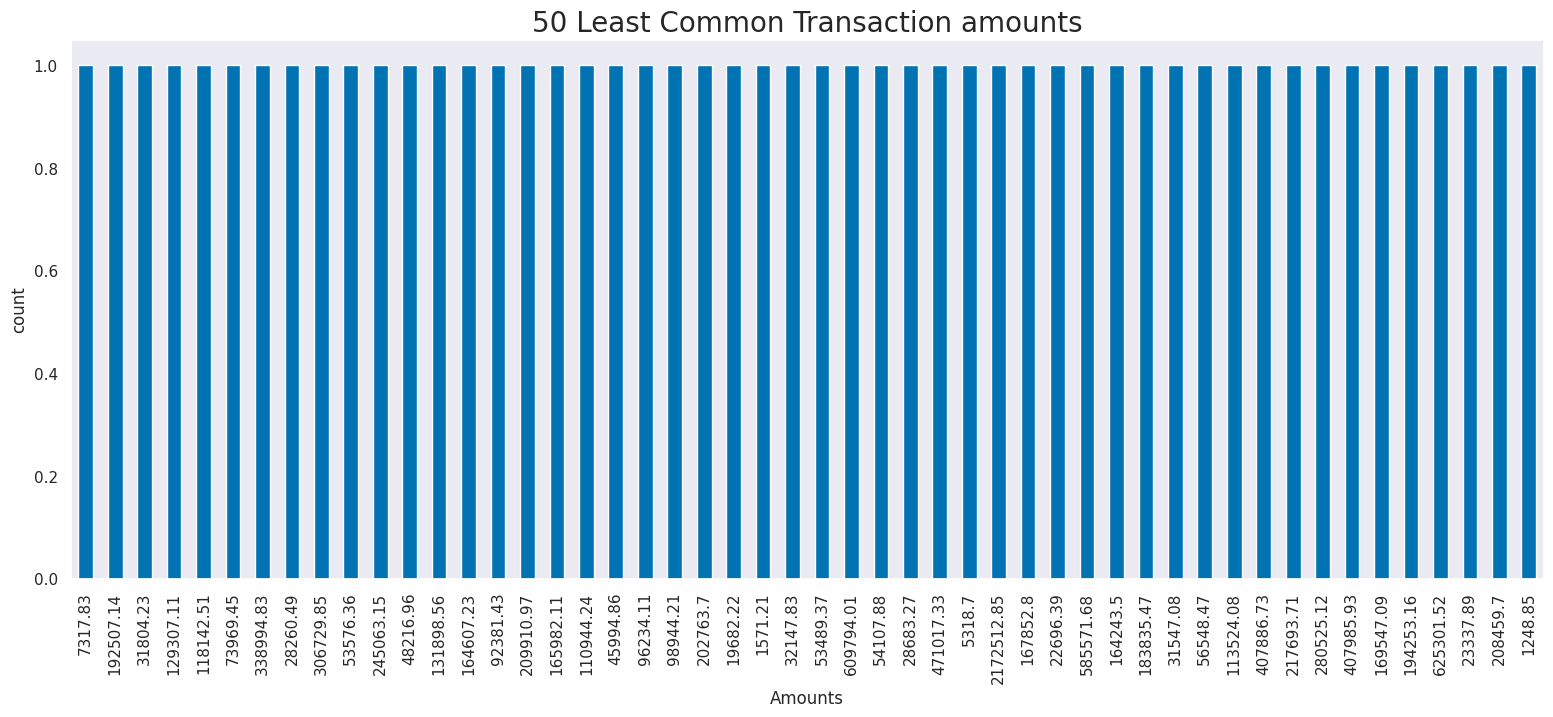

In [85]:
# checking the different values of amounts transationed

plt.rcParams['figure.figsize'] = (19, 7)

data['amount'].value_counts().tail(50).plot.bar()
plt.title('50 Least Common Transaction amounts', fontsize = 20)
plt.xlabel('Amounts')
plt.ylabel('count')
plt.show()

<ipython-input-86-8ee55beaaa83>:8: UserWarning: 

`distplot` is a deprecated function and will be removed in seaborn v0.14.0.

Please adapt your code to use either `displot` (a figure-level function with
similar flexibility) or `histplot` (an axes-level function for histograms).

For a guide to updating your code to use the new functions, please see
https://gist.github.com/mwaskom/de44147ed2974457ad6372750bbe5751

  ax = sns.distplot(data.amount)


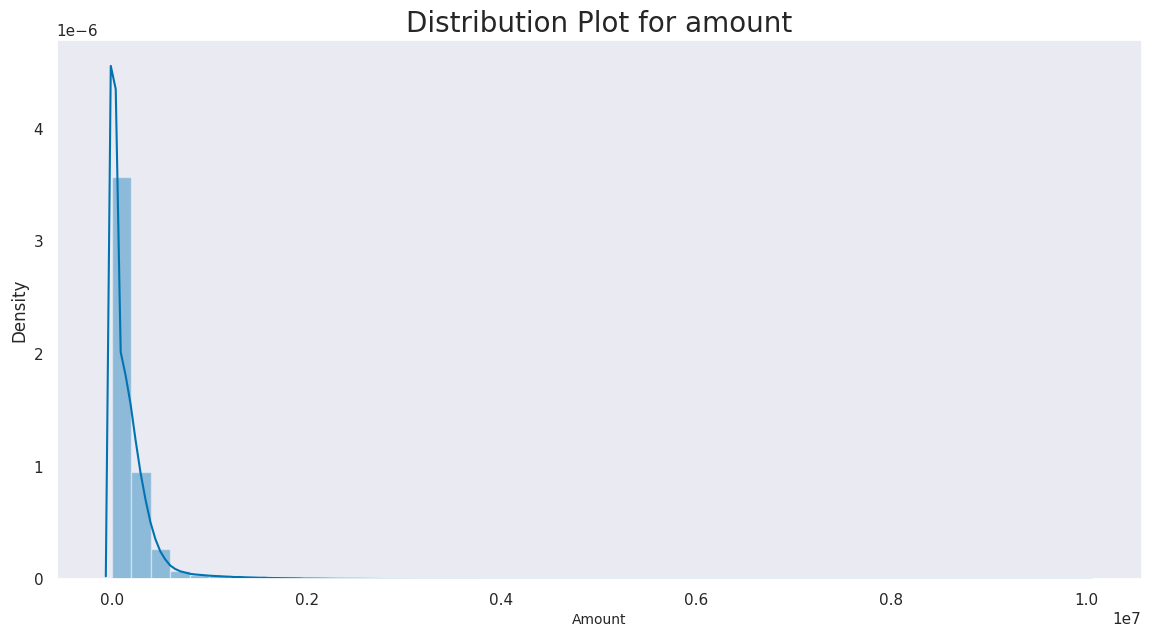

In [86]:
# setting thesze of the figure
plt.rcParams['figure.figsize'] =(14, 7)

# setting the style in seaborn
sns.set(style = 'dark', palette = 'colorblind')

#plotting a dist plot
ax = sns.distplot(data.amount)
ax.set_title(label = 'Distribution Plot for amount', fontsize = 20)
ax.set_xlabel(xlabel = 'Amount', fontsize = 10)
plt.show()

In [87]:
# finding  out the types of fraudulent transaction types out of all the transaction modes.

print('The Types of fraudulent transactions are {}'.format(list(data.loc[data.isFraud == 1].type.drop_duplicates().values)) )

The Types of fraudulent transactions are ['TRANSFER', 'CASH_OUT']


In [88]:
# figuring out the fraud transfer and fraud cash outs
dfFraudTransfer = data.loc[(data.isFraud == 1) & (data.type == 'TRANSFER')]
dfFraudCashout = data.loc[(data.isFraud == 1) & (data.type == 'CASH_OUT')]


#printing the number of fraudulent transfers ans cash outs
print ('The number of fraudulent TRANSFERs = {}'.format(len(dfFraudTransfer)))
print ('The number of fraudulent CASH_OUTs = {}'.format(len(dfFraudCashout)))

The number of fraudulent TRANSFERs = 107
The number of fraudulent CASH_OUTs = 115


In [89]:
# finding out the minimum and maximum transaction from Transfer and cash out transaction mode when it is set to be Fraud

print("Transfer Transaction")
print("Minimum Transaction :", data.loc[(data.isFraud == 1) & (data.type == 'TRANSFER')].amount.min())
print("Maximum Transaction :", data.loc[(data.isFraud == 1) & (data.type == 'TRANSFER')].amount.max())

print("\nCASH_OUT Transaction")
print("Minimum Transaction :", data.loc[(data.isFraud == 1) & (data.type == 'CASH_OUT')].amount.min())
print("Maximum Transaction :", data.loc[(data.isFraud == 1) & (data.type == 'CASH_OUT')].amount.max())

Transfer Transaction
Minimum Transaction : 119.0
Maximum Transaction : 10000000.0

CASH_OUT Transaction
Minimum Transaction : 119.0
Maximum Transaction : 10000000.0


In [90]:
#finding out the transactions which are flagged to be fraud

print("The Type of Transaction in which IsFlagged is set :", data.loc[data.isFlaggedFraud == 1].type.drop_duplicates().values)


The Type of Transaction in which IsFlagged is set : []


In [91]:
# figuringing out the no. of flagged fraudulent transactions
FlaggedFraud = data.loc[(data.isFlaggedFraud == 1) & (data.type == 'TRANSFER')]
print("The no. of Flagged Fraudulent Transactions :", len(FlaggedFraud))

# printing the minimum and maximum transactions done when FlaggedFraud is set
# the Transaction mode being Transfer
print("Minimum Transaction :", data.loc[data.isFlaggedFraud == 1].amount.min())
print("Maximum Transaction :", data.loc[data.isFlaggedFraud == 1].amount.max())


The no. of Flagged Fraudulent Transactions : 0
Minimum Transaction : nan
Maximum Transaction : nan


In [92]:
# Figuring out the transactions where old balance dest. and new balance dest. are 0 being FlaggedFraud

x = data.loc[(data.isFlaggedFraud == 0) & (data.oldbalanceDest == 0) & (data.newbalanceDest == 0)]
print("Figuring out the no. of transactions where old balance dest. and new balance dest. are 0 being FlaggedFraud :", x)

Figuring out the no. of transactions where old balance dest. and new balance dest. are 0 being FlaggedFraud :         step      type    amount     nameOrig  oldbalanceOrg  newbalanceOrig  \
0          1   PAYMENT   9839.64  C1231006815       170136.0       160296.36   
1          1   PAYMENT   1864.28  C1666544295        21249.0        19384.72   
2          1  TRANSFER    181.00  C1305486145          181.0            0.00   
4          1   PAYMENT  11668.14  C2048537720        41554.0        29885.86   
5          1   PAYMENT   7817.71    C90045638        53860.0        46042.29   
...      ...       ...       ...          ...            ...             ...   
472367    19   PAYMENT  19764.47   C488490710        12138.0            0.00   
472379    19   PAYMENT   2276.73   C234732023        91818.0        89541.27   
472381    19   PAYMENT  16440.41  C1412950367        52352.0        35911.59   
472384    19   PAYMENT  21879.00   C281988161            0.0            0.00   
472388    

**Dataset where only Transfer Transactions are mentioned**

In [93]:
# defining a dataset containing only transfer type of transactions

dataTransfer = data.loc[data['type'] == 'TRANSFER']

dataTransfer = pd.DataFrame(dataTransfer)

dataTransfer.head(10)

,step,type,amount,nameOrig,oldbalanceOrg,newbalanceOrig,nameDest,oldbalanceDest,newbalanceDest,isFraud,isFlaggedFraud
2,1,TRANSFER,181.00,C1305486145,181.00,0.0,C553264065,0.00,0.00,1.0,0.0
19,1,TRANSFER,215310.30,C1670993182,705.00,0.0,C1100439041,22425.00,0.00,0.0,0.0
24,1,TRANSFER,311685.89,C1984094095,10835.00,0.0,C932583850,6267.00,2719172.89,0.0,0.0
58,1,TRANSFER,62610.80,C1976401987,79114.00,16503.2,C1937962514,517.00,8383.29,0.0,0.0
78,1,TRANSFER,42712.39,C283039401,10363.39,0.0,C1330106945,57901.66,24044.18,0.0,0.0
79,1,TRANSFER,77957.68,C207471778,0.00,0.0,C1761291320,94900.00,22233.65,0.0,0.0
80,1,TRANSFER,17231.46,C1243171897,0.00,0.0,C783286238,24672.00,0.00,0.0,0.0
81,1,TRANSFER,78766.03,C1376151044,0.00,0.0,C1749186397,103772.00,277515.05,0.0,0.0
82,1,TRANSFER,224606.64,C873175411,0.00,0.0,C766572210,354678.92,0.00,0.0,0.0
83,1,TRANSFER,125872.53,C1443967876,0.00,0.0,C392292416,348512.00,3420103.09,0.0,0.0


**Minimum Original old Balance for Flagged Frauds**

In [94]:




# frauds having same old and new balance
# sorted by old orignal balance to check original old balance for flagged frauds

# this table shows flagged frauds with minimum original old balance


dataTransfer.loc[(dataTransfer.isFlaggedFraud == 1) & (dataTransfer.oldbalanceOrg == dataTransfer.newbalanceOrig)].sort_values(by = 'oldbalanceOrg').head(10)

,step,type,amount,nameOrig,oldbalanceOrg,newbalanceOrig,nameDest,oldbalanceDest,newbalanceDest,isFraud,isFlaggedFraud


**Maximum Original Balance for Flagged Frauds**

In [95]:
# frauds having same old and new balance
# sorted by old orignal balance to check original old balance for flagged frauds

# this table shows flagged frauds with maximum original old balance


dataTransfer.loc[(dataTransfer.isFlaggedFraud == 1) & (dataTransfer.oldbalanceOrg == dataTransfer.newbalanceOrig)].sort_values(by = 'oldbalanceOrg').tail(10)

,step,type,amount,nameOrig,oldbalanceOrg,newbalanceOrig,nameDest,oldbalanceDest,newbalanceDest,isFraud,isFlaggedFraud


**Minimum Original Old Balace for non-Flagged Frauds**

In [96]:
dataTransfer.loc[(dataTransfer['isFlaggedFraud'] == 0) & (dataTransfer.oldbalanceDest == dataTransfer.newbalanceDest)].sort_values(by = 'oldbalanceOrg').head(10)

,step,type,amount,nameOrig,oldbalanceOrg,newbalanceOrig,nameDest,oldbalanceDest,newbalanceDest,isFraud,isFlaggedFraud
321980,16,TRANSFER,21804.30,C109692244,0.0,0.0,C2067070452,26000000.0,26000000.0,0.0,0.0
175828,12,TRANSFER,18931.59,C257351690,0.0,0.0,C1108098323,0.0,0.0,0.0,0.0
189459,13,TRANSFER,59965.32,C1634536436,0.0,0.0,C1727565779,11800000.0,11800000.0,0.0,0.0
205309,13,TRANSFER,63516.77,C1271491174,0.0,0.0,C1361396394,21500000.0,21500000.0,0.0,0.0
213650,13,TRANSFER,29317.43,C1851703231,0.0,0.0,C1194392243,11100000.0,11100000.0,0.0,0.0
14548,8,TRANSFER,222598.32,C1279599757,0.0,0.0,C128870695,14500000.0,14500000.0,0.0,0.0
6018,6,TRANSFER,833142.33,C852612805,0.0,0.0,C769342184,12800000.0,12800000.0,0.0,0.0
282796,15,TRANSFER,421255.41,C1734485985,0.0,0.0,C981307359,0.0,0.0,0.0,0.0
169672,12,TRANSFER,345637.23,C1164658704,0.0,0.0,C1383605612,29600000.0,29600000.0,0.0,0.0
295577,15,TRANSFER,120886.64,C698389861,0.0,0.0,C1552859894,11400000.0,11400000.0,0.0,0.0


**Maximum Original Old Balance for Non-Flagged Frauds**

In [97]:
dataTransfer.loc[(dataTransfer['isFlaggedFraud'] == 0) & (dataTransfer.oldbalanceDest == dataTransfer.newbalanceDest)].sort_values(by = 'oldbalanceOrg').tail(10)

,step,type,amount,nameOrig,oldbalanceOrg,newbalanceOrig,nameDest,oldbalanceDest,newbalanceDest,isFraud,isFlaggedFraud
204215,13,TRANSFER,2686564.04,C364029634,2686564.04,0.00,C2041291172,0.0,0.0,1.0,0.0
338007,16,TRANSFER,2701905.30,C494334546,2701905.30,0.00,C428725863,0.0,0.0,1.0,0.0
102289,10,TRANSFER,273367.98,C1464149467,2833932.61,2560564.63,C981988827,0.0,0.0,0.0,0.0
242982,14,TRANSFER,2927005.15,C2081788795,2927005.15,0.00,C2138456206,0.0,0.0,1.0,0.0
4442,4,TRANSFER,2930418.44,C2047521920,2930418.44,0.00,C449261773,0.0,0.0,1.0,0.0
151657,12,TRANSFER,3964129.99,C576568419,3964129.99,0.00,C1571546632,0.0,0.0,1.0,0.0
196775,13,TRANSFER,4022667.54,C735463888,4022667.54,0.00,C1548348754,0.0,0.0,1.0,0.0
10395,7,TRANSFER,5460002.91,C666654362,5460002.91,0.00,C1726301214,0.0,0.0,1.0,0.0
217320,13,TRANSFER,6188514.81,C135832352,6188514.81,0.00,C2009346140,0.0,0.0,1.0,0.0
4440,4,TRANSFER,10000000.00,C7162498,12900000.00,2930418.44,C945327594,0.0,0.0,1.0,0.0


In [98]:
# finding out the minimum and maximum amount for oldbalance original where oldbalance and newbalance for dest is same.

dataFlagged = data.loc[data.isFlaggedFraud == 1]

print('Minimum Balance of oldBalanceOrig for FlaggedFraud and Transfer mode :', dataFlagged.oldbalanceOrg.min())
print('Maximum Balance of oldbalanceOrig for FlaggedFraud and Transfer mode :', dataFlagged.oldbalanceOrg.max())


Minimum Balance of oldBalanceOrig for FlaggedFraud and Transfer mode : nan
Maximum Balance of oldbalanceOrig for FlaggedFraud and Transfer mode : nan


In [99]:
# Finding the maximum and minimum balance in original balance when newbalance original and oldbalance original are equal

print('Minimum Balance of oldbalanceOrig for non FlaggedFraud and Transfer mode:',
      data[(data.type == 'TRANSFER') & (data.isFlaggedFraud == 0) & (data.oldbalanceOrg == data.newbalanceOrig)].oldbalanceOrg.min())
print('Maximum Balance of oldbalanceOrig for non FlaggedFraud and Transfer mode:',
      data[(data.type == 'TRANSFER') & (data.isFlaggedFraud == 0) & (data.oldbalanceOrg == data.newbalanceOrig)].oldbalanceOrg.max())

# Can isFlaggedFraud be set based on seeing a customer transacting more than once? Note that duplicate customer names don't exist within 
# transactions where isFlaggedFraud is set, but duplicate customer names exist within transactions where isFlaggedFraud is not set. It turns 
# out that originators of transactions that have isFlaggedFraud set have transacted only once. Very few destination accounts of transactions 
# that have isFlaggedFraud set have transacted more than once.

Minimum Balance of oldbalanceOrig for non FlaggedFraud and Transfer mode: 0.0
Maximum Balance of oldbalanceOrig for non FlaggedFraud and Transfer mode: 575667.54


In [100]:
print('Minimum Balance of oldbalanceOrig for  FlaggedFraud and Transfer mode:',
      data[(data.type == 'TRANSFER') & (data.isFlaggedFraud == 1) & (data.oldbalanceOrg == data.newbalanceOrig)].oldbalanceOrg.min())
print('Maximum Balance of oldbalanceOrig for non FlaggedFraud and Transfer mode:',
      data[(data.type == 'TRANSFER') & (data.isFlaggedFraud == 1) & (data.oldbalanceOrg == data.newbalanceOrig)].oldbalanceOrg.max())

Minimum Balance of oldbalanceOrig for  FlaggedFraud and Transfer mode: nan
Maximum Balance of oldbalanceOrig for non FlaggedFraud and Transfer mode: nan


In [101]:
data['nameDest'].value_counts().head(20)

C985934102     91
C248609774     87
C1286084959    87
C665576141     83
C2083562754    82
C1590550415    79
C977993101     78
C1360767589    77
C451111351     75
C97730845      72
C306206744     70
C1899073220    69
C1234776885    69
C716083600     68
C1023714065    67
C667346055     66
C909295153     65
C932583850     64
C1782113663    64
C1789550256    64
Name: nameDest, dtype: int64

In [102]:
# making dependent and independent sets

X = data.loc[(data.type == 'TRANSFER') | (data.type == 'CASH_OUT')]

# shape of x
X.shape


(210219, 11)

In [103]:
X.head()

,step,type,amount,nameOrig,oldbalanceOrg,newbalanceOrig,nameDest,oldbalanceDest,newbalanceDest,isFraud,isFlaggedFraud
2,1,TRANSFER,181.00,C1305486145,181.0,0.0,C553264065,0.0,0.00,1.0,0.0
3,1,CASH_OUT,181.00,C840083671,181.0,0.0,C38997010,21182.0,0.00,1.0,0.0
15,1,CASH_OUT,229133.94,C905080434,15325.0,0.0,C476402209,5083.0,51513.44,0.0,0.0
19,1,TRANSFER,215310.30,C1670993182,705.0,0.0,C1100439041,22425.0,0.00,0.0,0.0
24,1,TRANSFER,311685.89,C1984094095,10835.0,0.0,C932583850,6267.0,2719172.89,0.0,0.0


In [104]:
# feature engg.

X['errorBalanceOrig'] = X.newbalanceOrig + X.amount - X.oldbalanceOrg
X['errorBalanceDest'] = X.oldbalanceDest + X.amount - X.newbalanceDest

<ipython-input-104-f0384320cda1>:3: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  X['errorBalanceOrig'] = X.newbalanceOrig + X.amount - X.oldbalanceOrg
<ipython-input-104-f0384320cda1>:4: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  X['errorBalanceDest'] = X.oldbalanceDest + X.amount - X.newbalanceDest


In [105]:
# removing unwanted columns

X = X.drop(['nameDest','nameOrig'], axis = 1)

# checking the new shape of data
X.shape

(210219, 11)

In [106]:
# label encoding for the transaction type

X['type'].replace('TRANSFER', 0, inplace = True)
X['type'].replace('CASH_OUT', 1, inplace = True)

In [107]:
# looking at the head of the data

X.head(10)

,step,type,amount,oldbalanceOrg,newbalanceOrig,oldbalanceDest,newbalanceDest,isFraud,isFlaggedFraud,errorBalanceOrig,errorBalanceDest
2,1,0,181.00,181.00,0.0,0.0,0.00,1.0,0.0,0.00,181.00
3,1,1,181.00,181.00,0.0,21182.0,0.00,1.0,0.0,0.00,21363.00
15,1,1,229133.94,15325.00,0.0,5083.0,51513.44,0.0,0.0,213808.94,182703.50
19,1,0,215310.30,705.00,0.0,22425.0,0.00,0.0,0.0,214605.30,237735.30
24,1,0,311685.89,10835.00,0.0,6267.0,2719172.89,0.0,0.0,300850.89,-2401220.00
42,1,1,110414.71,26845.41,0.0,288800.0,2415.16,0.0,0.0,83569.30,396799.55
47,1,1,56953.90,1942.02,0.0,70253.0,64106.18,0.0,0.0,55011.88,63100.72
48,1,1,5346.89,0.00,0.0,652637.0,6453430.91,0.0,0.0,5346.89,-5795447.02
51,1,1,23261.30,20411.53,0.0,25742.0,0.00,0.0,0.0,2849.77,49003.30
58,1,0,62610.80,79114.00,16503.2,517.0,8383.29,0.0,0.0,0.00,54744.51


In [108]:
# checking if the dataset contains any NULL values

X.isnull().any().any()

False

<ipython-input-109-99472f7a202b>:7: UserWarning: 

`distplot` is a deprecated function and will be removed in seaborn v0.14.0.

Please adapt your code to use either `displot` (a figure-level function with
similar flexibility) or `histplot` (an axes-level function for histograms).

For a guide to updating your code to use the new functions, please see
https://gist.github.com/mwaskom/de44147ed2974457ad6372750bbe5751

  sns.distplot(X['errorBalanceOrig'], color = 'red')
<ipython-input-109-99472f7a202b>:11: UserWarning: 

`distplot` is a deprecated function and will be removed in seaborn v0.14.0.

Please adapt your code to use either `displot` (a figure-level function with
similar flexibility) or `histplot` (an axes-level function for histograms).

For a guide to updating your code to use the new functions, please see
https://gist.github.com/mwaskom/de44147ed2974457ad6372750bbe5751

  sns.distplot(X['errorBalanceDest'], color = 'red')


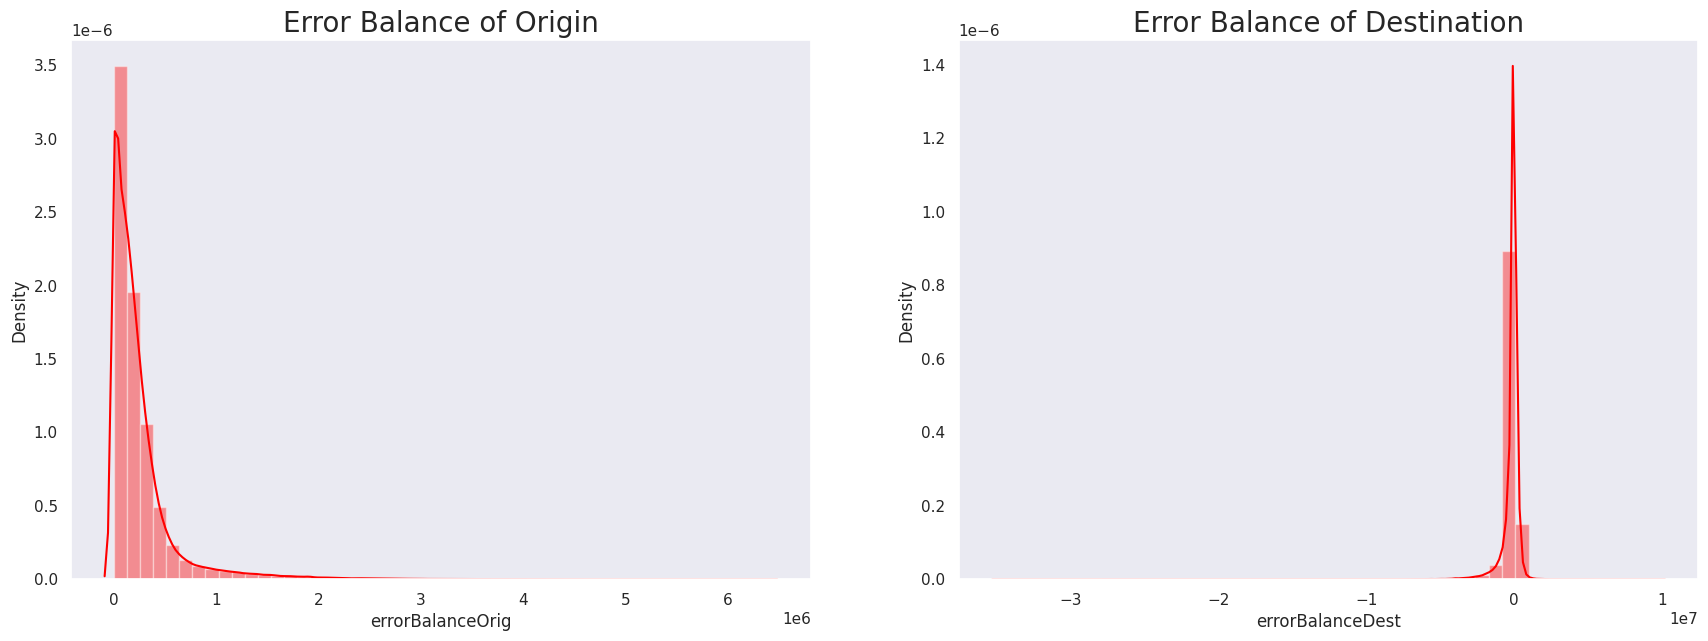

In [109]:
# visualizing the distribution of errorbalance

# setting the size of the plot
plt.rcParams['figure.figsize'] = (21, 7)

plt.subplot(121)
sns.distplot(X['errorBalanceOrig'], color = 'red')
plt.title('Error Balance of Origin', fontsize = 20)

plt.subplot(122)
sns.distplot(X['errorBalanceDest'], color = 'red')
plt.title('Error Balance of Destination', fontsize = 20)

plt.show()

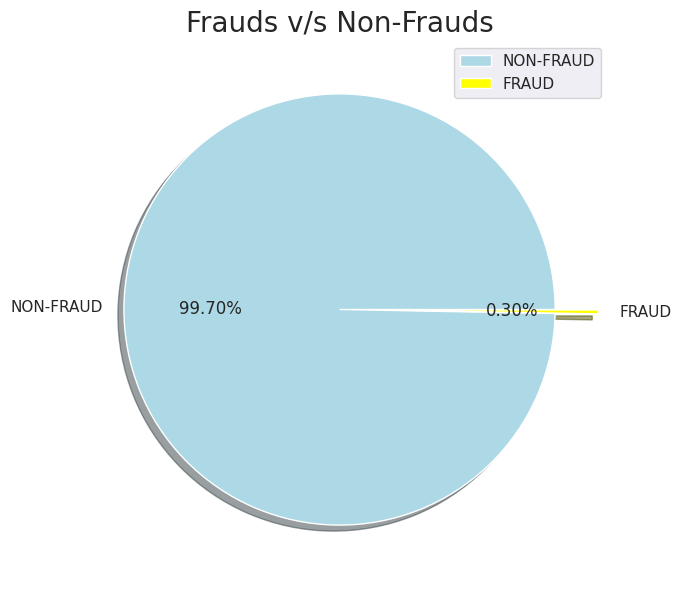

In [110]:
# checking the no. of frauds in the dataset

X['isFraud'].value_counts()

# plotting a pie chart to represent the fraction of the frauds 

size = [2762196, 8213]
labels = ['NON-FRAUD', 'FRAUD']
colors = ['lightblue', 'yellow']
explode = [0, 0.2]

plt.pie(size, labels = labels, colors = colors, explode = explode, shadow  = True, autopct = '%.2f%%')
plt.title('Frauds v/s Non-Frauds', fontsize = 20)
plt.axis('off')
plt.legend()
plt.show()

In [111]:
X['isFraud'].value_counts()

0.0    209997
1.0       222
Name: isFraud, dtype: int64

In [112]:
# making our independent set

Y = X['isFraud']

# removing the dependent set
X = X.drop(['isFraud'], axis = 1)

# getting the shapes of x and y
print("Shape of x: ", X.shape)
print("Shape of y: ", Y.shape)


Shape of x:  (210219, 10)
Shape of y:  (210219,)


In [113]:
X.head()

,step,type,amount,oldbalanceOrg,newbalanceOrig,oldbalanceDest,newbalanceDest,isFlaggedFraud,errorBalanceOrig,errorBalanceDest
2,1,0,181.00,181.0,0.0,0.0,0.00,0.0,0.00,181.0
3,1,1,181.00,181.0,0.0,21182.0,0.00,0.0,0.00,21363.0
15,1,1,229133.94,15325.0,0.0,5083.0,51513.44,0.0,213808.94,182703.5
19,1,0,215310.30,705.0,0.0,22425.0,0.00,0.0,214605.30,237735.3
24,1,0,311685.89,10835.0,0.0,6267.0,2719172.89,0.0,300850.89,-2401220.0


**OVER-SAMPLING**

In [114]:
from imblearn.over_sampling import SMOTE

oversample = SMOTE()
x_resample, y_resample = oversample.fit_resample(X, Y.values.ravel())

# getting the shapes of x and y after resampling
print("Shape of x: ", x_resample.shape)
print("Shape of y:", y_resample.shape)

Shape of x:  (419994, 10)
Shape of y: (419994,)


In [115]:
# splitting the dataset into train and tests

from sklearn.model_selection import train_test_split

x_train, x_test, y_train, y_test = train_test_split(x_resample, y_resample, test_size = 0.2, random_state = 0)

# checking the new shapes
print("Shape of x_train: ", x_train.shape)
print("Shape of x_test: ", x_test.shape)
print("Shape of y_train: ", y_train.shape)
print("Shape of y_test: ", y_test.shape)

Shape of x_train:  (335995, 10)
Shape of x_test:  (83999, 10)
Shape of y_train:  (335995,)
Shape of y_test:  (83999,)


In [116]:
# performing standard scaling on the data for better fit

from sklearn.preprocessing import StandardScaler

sc = StandardScaler()

x_train = sc.fit_transform(x_train)
x_test = sc.transform(x_test)

**Modelling using Xg-Boost Model**

In [117]:
# Using XGBOOST


import xgboost as xgb
from xgboost.sklearn import XGBClassifier
from sklearn.metrics import average_precision_score

model = XGBClassifier()
model.fit(x_train, y_train)

y_pred = model.predict(x_test)

# score of the model
auprc = average_precision_score(y_test, y_pred)
print("The Area under Precision Recall Curve Score is", auprc)

The Area under Precision Recall Curve Score is 0.9979093540448923


In [118]:
# looking at the confusion matrix

from sklearn.metrics import confusion_matrix

cm = confusion_matrix(y_test, y_pred)

print(cm)

[[42119    79]
 [   17 41784]]
